In [1]:
import pandas as pd
df = pd.read_csv("matches.csv")

In [2]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Possession (%),Attendance,Captain,Formation,Opposition Formation,Team
0,9/1/2024,16:00,Matchweek 3,Sun,Home,L,0,3,Liverpool,1.4,1.8,53,"73,738",Bruno Fernandes,4-2-3-1,4-2-3-1,Manchester United
1,9/29/2024,16:30,Matchweek 6,Sun,Home,L,0,3,Tottenham,1.0,4.4,39,"73,587",Bruno Fernandes,4-2-3-1,4-3-3,Manchester United
2,11/3/2024,16:30,Matchweek 10,Sun,Home,D,1,1,Chelsea,2.0,1.1,46,"73,813",Bruno Fernandes,4-2-3-1,4-2-3-1,Manchester United
3,12/4/2024,20:15,Matchweek 14,Wed,Away,L,0,2,Arsenal,0.2,2.1,49,"60,256",Bruno Fernandes,3-4-3,4-3-3,Manchester United
4,12/15/2024,16:30,Matchweek 16,Sun,Away,W,2,1,Manchester City,2.1,0.9,48,"53,184",Bruno Fernandes,3-4-3,4-1-4-1,Manchester United


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  240 non-null    object 
 1   Time                  240 non-null    object 
 2   Round                 240 non-null    object 
 3   Day                   240 non-null    object 
 4   Venue                 240 non-null    object 
 5   Result                240 non-null    object 
 6   GF                    240 non-null    int64  
 7   GA                    240 non-null    int64  
 8   Opponent              240 non-null    object 
 9   xG                    240 non-null    float64
 10  xGA                   240 non-null    float64
 11  Possession (%)        240 non-null    int64  
 12  Attendance            240 non-null    object 
 13  Captain               240 non-null    object 
 14  Formation             240 non-null    object 
 15  Opposition Formation  2

In [4]:
df.isnull().sum()

Date                    0
Time                    0
Round                   0
Day                     0
Venue                   0
Result                  0
GF                      0
GA                      0
Opponent                0
xG                      0
xGA                     0
Possession (%)          0
Attendance              0
Captain                 0
Formation               0
Opposition Formation    0
Team                    0
dtype: int64

In [5]:
df.describe()

,GF,GA,xG,xGA,Possession (%)
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1.650000,1.650000,1.584167,1.584167,50.000000
std,1.376126,1.376126,0.983546,0.983546,11.055584
min,0.000000,0.000000,0.100000,0.100000,20.000000
25%,1.000000,1.000000,0.875000,0.875000,43.000000
50%,1.000000,1.000000,1.400000,1.400000,50.000000
75%,2.000000,2.000000,2.100000,2.100000,57.000000
max,7.000000,7.000000,5.600000,5.600000,80.000000


In [6]:
df.shape

(240, 17)

In [7]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Clean Team and Opponent names (remove extra spaces)
df["Team"] = df["Team"].str.strip()
df["Opponent"] = df["Opponent"].str.strip()

print(df.head())

        Date    Time         Round  Day Venue Result  GF  GA         Opponent  \
0 2024-09-01  16:00    Matchweek 3  Sun  Home      L   0   3        Liverpool   
1 2024-09-29  16:30    Matchweek 6  Sun  Home      L   0   3        Tottenham   
2 2024-11-03  16:30   Matchweek 10  Sun  Home      D   1   1          Chelsea   
3 2024-12-04  20:15   Matchweek 14  Wed  Away      L   0   2          Arsenal   
4 2024-12-15  16:30   Matchweek 16  Sun  Away      W   2   1  Manchester City   

    xG  xGA  Possession (%) Attendance          Captain Formation  \
0  1.4  1.8              53     73,738  Bruno Fernandes   4-2-3-1   
1  1.0  4.4              39     73,587  Bruno Fernandes   4-2-3-1   
2  2.0  1.1              46     73,813  Bruno Fernandes   4-2-3-1   
3  0.2  2.1              49     60,256  Bruno Fernandes     3-4-3   
4  2.1  0.9              48     53,184  Bruno Fernandes     3-4-3   

  Opposition Formation               Team  
0              4-2-3-1  Manchester United  
1         

In [8]:
df = df.drop(columns=["Attendance"], errors="ignore") 
print(df.head())

        Date    Time         Round  Day Venue Result  GF  GA         Opponent  \
0 2024-09-01  16:00    Matchweek 3  Sun  Home      L   0   3        Liverpool   
1 2024-09-29  16:30    Matchweek 6  Sun  Home      L   0   3        Tottenham   
2 2024-11-03  16:30   Matchweek 10  Sun  Home      D   1   1          Chelsea   
3 2024-12-04  20:15   Matchweek 14  Wed  Away      L   0   2          Arsenal   
4 2024-12-15  16:30   Matchweek 16  Sun  Away      W   2   1  Manchester City   

    xG  xGA  Possession (%)          Captain Formation Opposition Formation  \
0  1.4  1.8              53  Bruno Fernandes   4-2-3-1              4-2-3-1   
1  1.0  4.4              39  Bruno Fernandes   4-2-3-1                4-3-3   
2  2.0  1.1              46  Bruno Fernandes   4-2-3-1              4-2-3-1   
3  0.2  2.1              49  Bruno Fernandes     3-4-3                4-3-3   
4  2.1  0.9              48  Bruno Fernandes     3-4-3              4-1-4-1   

                Team  
0  Manchester U

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


# Drop duplicates if any
df = df.drop_duplicates()

# Check for NaN values in key columns
key_cols = ["Team", "Opponent", "GF", "GA", "Result"]
missing = df[key_cols].isnull().sum()
print("Missing values in key columns:\n", missing)

print(f"Dataset shape after cleaning: {df.shape}")
print(df.head())

Number of duplicate rows: 0
Missing values in key columns:
 Team        0
Opponent    0
GF          0
GA          0
Result      0
dtype: int64
Dataset shape after cleaning: (240, 16)
        Date    Time         Round  Day Venue Result  GF  GA         Opponent  \
0 2024-09-01  16:00    Matchweek 3  Sun  Home      L   0   3        Liverpool   
1 2024-09-29  16:30    Matchweek 6  Sun  Home      L   0   3        Tottenham   
2 2024-11-03  16:30   Matchweek 10  Sun  Home      D   1   1          Chelsea   
3 2024-12-04  20:15   Matchweek 14  Wed  Away      L   0   2          Arsenal   
4 2024-12-15  16:30   Matchweek 16  Sun  Away      W   2   1  Manchester City   

    xG  xGA  Possession (%)          Captain Formation Opposition Formation  \
0  1.4  1.8              53  Bruno Fernandes   4-2-3-1              4-2-3-1   
1  1.0  4.4              39  Bruno Fernandes   4-2-3-1                4-3-3   
2  2.0  1.1              46  Bruno Fernandes   4-2-3-1              4-2-3-1   
3  0.2  2.1   

In [10]:
df = df.drop(columns=["Unnamed: 17"], errors="ignore")

print(f"Final dataset shape: {df.shape}")
print(df.columns)
print(df.head())

Final dataset shape: (240, 16)
Index(['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Possession (%)', 'Captain', 'Formation',
       'Opposition Formation', 'Team'],
      dtype='object')
        Date    Time         Round  Day Venue Result  GF  GA         Opponent  \
0 2024-09-01  16:00    Matchweek 3  Sun  Home      L   0   3        Liverpool   
1 2024-09-29  16:30    Matchweek 6  Sun  Home      L   0   3        Tottenham   
2 2024-11-03  16:30   Matchweek 10  Sun  Home      D   1   1          Chelsea   
3 2024-12-04  20:15   Matchweek 14  Wed  Away      L   0   2          Arsenal   
4 2024-12-15  16:30   Matchweek 16  Sun  Away      W   2   1  Manchester City   

    xG  xGA  Possession (%)          Captain Formation Opposition Formation  \
0  1.4  1.8              53  Bruno Fernandes   4-2-3-1              4-2-3-1   
1  1.0  4.4              39  Bruno Fernandes   4-2-3-1                4-3-3   
2  2.0  1.1              46  Bruno Fern

In [11]:
# Count number of matches per team
team_counts = df["Team"].value_counts()
print("Matches per Team:\n", team_counts)

# check Opponents
opponent_counts = df["Opponent"].value_counts()
print("\nMatches per Opponent:\n", opponent_counts)

Matches per Team:
 Team
Manchester United    40
Liverpool            40
Arsenal              40
Chelsea              40
Manchester City      40
Tottenham            40
Name: count, dtype: int64

Matches per Opponent:
 Opponent
Liverpool          40
Tottenham          40
Chelsea            40
Arsenal            40
Manchester City    40
Manchester Utd     40
Name: count, dtype: int64


In [12]:
df["Opponent"] = df["Opponent"].replace({
    "Manchester Utd": "Manchester United"})
print(df.head())

        Date    Time         Round  Day Venue Result  GF  GA         Opponent  \
0 2024-09-01  16:00    Matchweek 3  Sun  Home      L   0   3        Liverpool   
1 2024-09-29  16:30    Matchweek 6  Sun  Home      L   0   3        Tottenham   
2 2024-11-03  16:30   Matchweek 10  Sun  Home      D   1   1          Chelsea   
3 2024-12-04  20:15   Matchweek 14  Wed  Away      L   0   2          Arsenal   
4 2024-12-15  16:30   Matchweek 16  Sun  Away      W   2   1  Manchester City   

    xG  xGA  Possession (%)          Captain Formation Opposition Formation  \
0  1.4  1.8              53  Bruno Fernandes   4-2-3-1              4-2-3-1   
1  1.0  4.4              39  Bruno Fernandes   4-2-3-1                4-3-3   
2  2.0  1.1              46  Bruno Fernandes   4-2-3-1              4-2-3-1   
3  0.2  2.1              49  Bruno Fernandes     3-4-3                4-3-3   
4  2.1  0.9              48  Bruno Fernandes     3-4-3              4-1-4-1   

                Team  
0  Manchester U

In [13]:
# Results distribution (W/D/L)
print(df["Result"].value_counts())

# Goals scored & conceded
print("Average Goals Scored per Match:", df["GF"].mean())
print("Average Goals Conceded per Match:", df["GA"].mean())

# Basic statistics for numeric columns
print(df[["GF", "GA", "xG", "xGA", "Possession (%)"]].describe())

Result
L    85
W    85
D    70
Name: count, dtype: int64
Average Goals Scored per Match: 1.65
Average Goals Conceded per Match: 1.65
               GF          GA          xG         xGA  Possession (%)
count  240.000000  240.000000  240.000000  240.000000      240.000000
mean     1.650000    1.650000    1.584167    1.584167       50.000000
std      1.376126    1.376126    0.983546    0.983546       11.055584
min      0.000000    0.000000    0.100000    0.100000       20.000000
25%      1.000000    1.000000    0.875000    0.875000       43.000000
50%      1.000000    1.000000    1.400000    1.400000       50.000000
75%      2.000000    2.000000    2.100000    2.100000       57.000000
max      7.000000    7.000000    5.600000    5.600000       80.000000


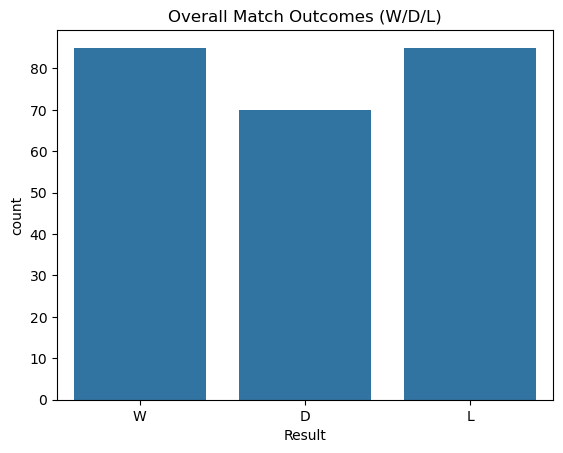

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Results distribution
sns.countplot(data=df, x="Result", order=["W","D","L"])
plt.title("Overall Match Outcomes (W/D/L)")
plt.show()

In [15]:
import pandas as pd
import numpy as np

team_reports = {}

for team in df["Team"].unique():
    data = df[df["Team"] == team]
    result_counts = data["Result"].value_counts()

    team_reports[team] = {
        "Matches Played": len(data),
        "Wins": int(result_counts.get("W", 0)),
        "Draws": int(result_counts.get("D", 0)),
        "Losses": int(result_counts.get("L", 0)),
        "Goals For": int(data["GF"].sum()),
        "Goals Against": int(data["GA"].sum()),
        "Average xG": round(data["xG"].mean(), 2),
        "Average xGA": round(data["xGA"].mean(), 2),
        "Avg Possession %": round(data["Possession (%)"].mean(), 1),
    }

team_report_df = pd.DataFrame(team_reports).T

# Format numeric columns cleanly
team_report_df = team_report_df.astype({
    "Matches Played": int,
    "Wins": int,
    "Draws": int,
    "Losses": int,
    "Goals For": int,
    "Goals Against": int
})

print(team_report_df)

                   Matches Played  Wins  Draws  Losses  Goals For  \
Manchester United              40    10     11      19         51   
Liverpool                      40    16     18       6         88   
Arsenal                        40    20     10      10         73   
Chelsea                        40    10     14      16         52   
Manchester City                40    19     10      11         73   
Tottenham                      40    10      7      23         59   

                   Goals Against  Average xG  Average xGA  Avg Possession %  
Manchester United             83        1.31         2.03              41.8  
Liverpool                     53        1.94         1.39              52.4  
Arsenal                       62        1.44         1.51              46.6  
Chelsea                       63        1.50         1.60              51.4  
Manchester City               52        1.84         1.16              59.7  
Tottenham                     83        1.48    

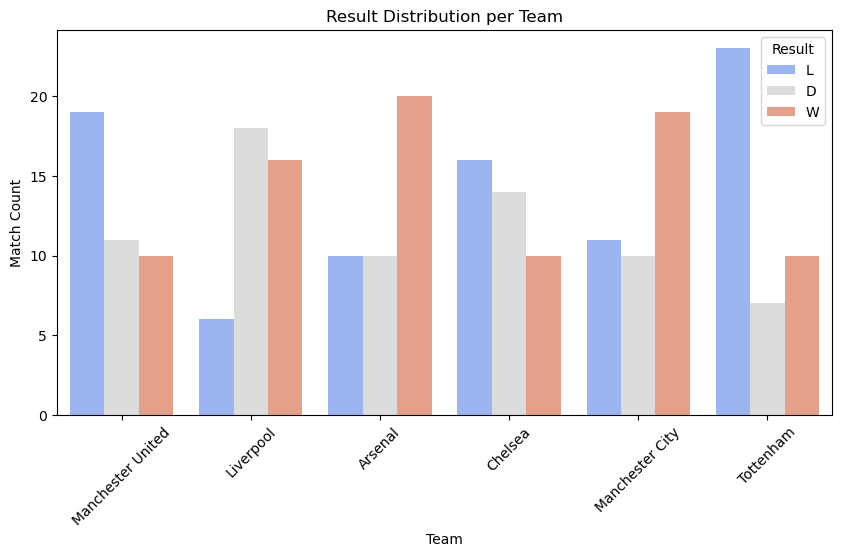

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Team", hue="Result", palette="coolwarm")
plt.title("Result Distribution per Team")
plt.xlabel("Team")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.show()

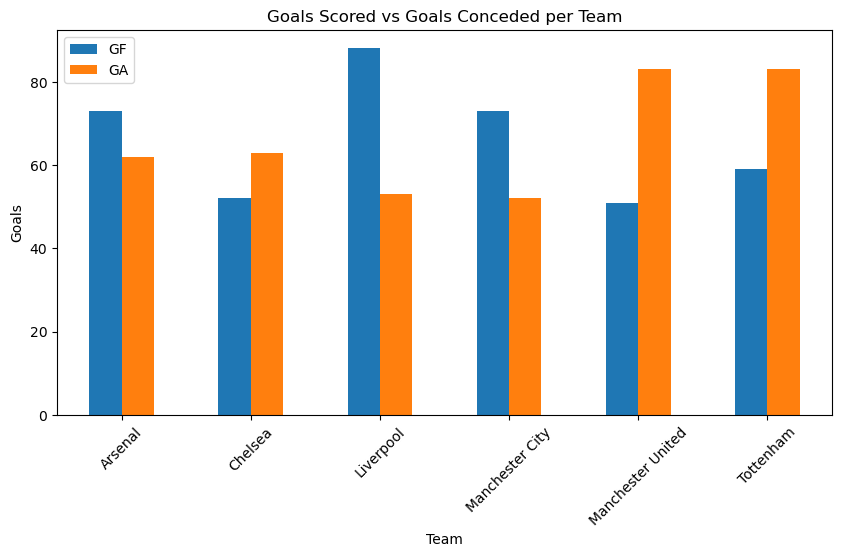

In [17]:
gf_ga = df.groupby("Team")[["GF", "GA"]].sum().reset_index()

gf_ga.plot(x="Team", kind="bar", figsize=(10,5))
plt.title("Goals Scored vs Goals Conceded per Team")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.show()

Result                    D   L   W
Team              Venue            
Arsenal           Away    8   6   6
                  Home    2   4  14
Chelsea           Away    5  11   4
                  Home    9   5   6
Liverpool         Away    8   6   6
                  Home   10   0  10
Manchester City   Away    4   7   9
                  Home    6   4  10
Manchester United Away    5  13   2
                  Home    6   6   8
Tottenham         Away    5  12   3
                  Home    2  11   7


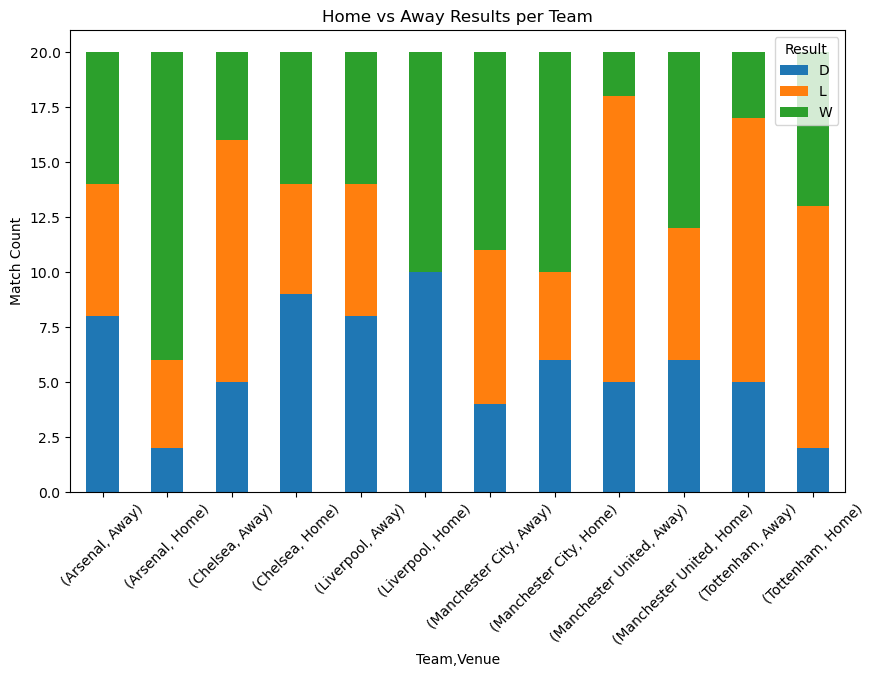

In [18]:
home_away = df.groupby(["Team", "Venue"])["Result"].value_counts().unstack(fill_value=0)

print(home_away)

home_away.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Home vs Away Results per Team")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.show()


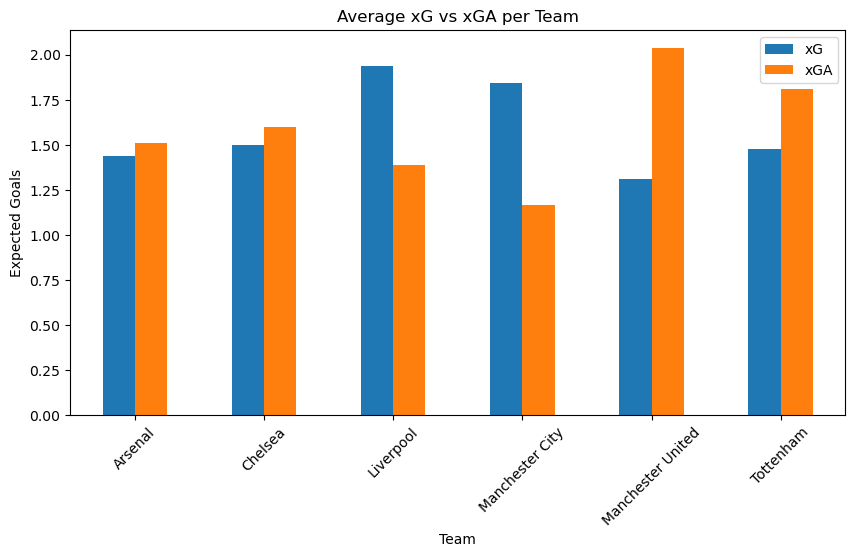

In [19]:
xg_comparison = df.groupby("Team")[["xG", "xGA"]].mean().reset_index()

xg_comparison.plot(x="Team", kind="bar", figsize=(10,5))
plt.title("Average xG vs xGA per Team")
plt.ylabel("Expected Goals")
plt.xticks(rotation=45)
plt.show()

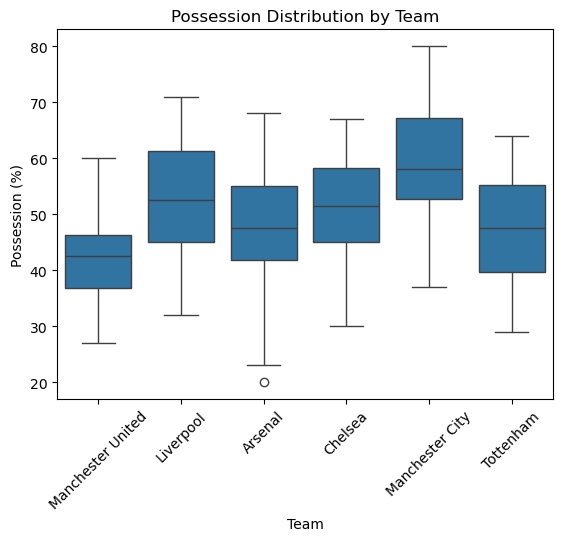

In [20]:
sns.boxplot(data=df, x="Team", y="Possession (%)")
plt.title("Possession Distribution by Team")
plt.xticks(rotation=45)
plt.show()


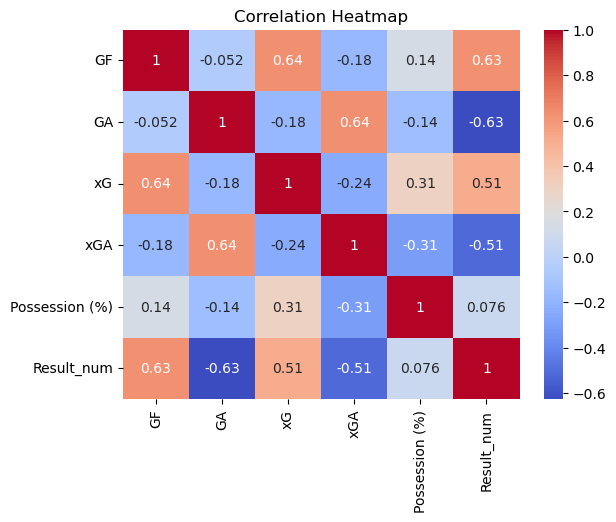

In [21]:
# Encode Result as numeric: W=1, D=0, L=-1
result_map = {"W":1, "D":0, "L":-1}
df["Result_num"] = df["Result"].map(result_map)

# Correlation matrix
corr = df[["GF","GA","xG","xGA","Possession (%)","Result_num"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
def team_summary(team):
    data = df[df["Team"] == team]
    print(f"\n===== {team} =====")
    print(data["Result"].value_counts())
    print("\nGoals Summary:")
    print("GF Total:", data["GF"].sum(), "| GA Total:", data["GA"].sum())
    print("Avg xG:", round(data["xG"].mean(),2), "| Avg xGA:", round(data["xGA"].mean(),2))
    print("Avg Possession:", round(data["Possession (%)"].mean(),1), "%")
    
    sns.countplot(data=data, x="Venue", hue="Result", palette="coolwarm")
    plt.title(f"{team} - Home vs Away Performance")
    plt.show()


===== Arsenal =====
Result
W    20
D    10
L    10
Name: count, dtype: int64

Goals Summary:
GF Total: 73 | GA Total: 62
Avg xG: 1.44 | Avg xGA: 1.51
Avg Possession: 46.6 %


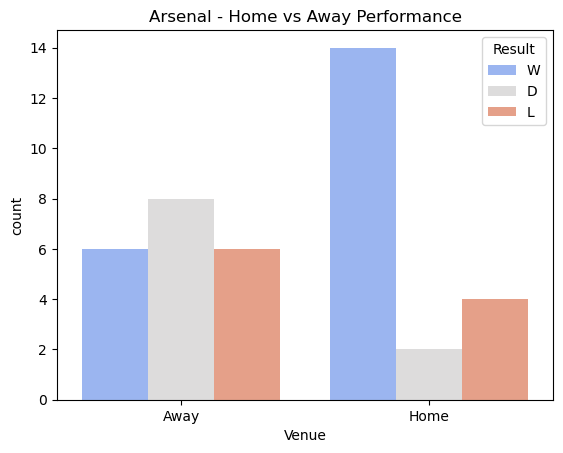

In [23]:
team_summary("Arsenal")


===== Chelsea =====
Result
L    16
D    14
W    10
Name: count, dtype: int64

Goals Summary:
GF Total: 52 | GA Total: 63
Avg xG: 1.5 | Avg xGA: 1.6
Avg Possession: 51.4 %


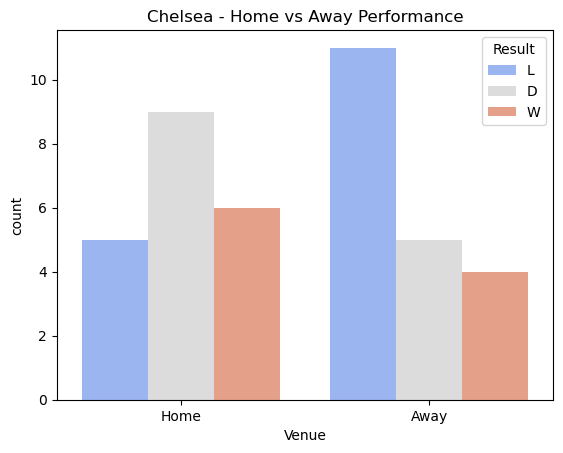

In [24]:
team_summary("Chelsea")


===== Manchester United =====
Result
L    19
D    11
W    10
Name: count, dtype: int64

Goals Summary:
GF Total: 51 | GA Total: 83
Avg xG: 1.31 | Avg xGA: 2.03
Avg Possession: 41.8 %


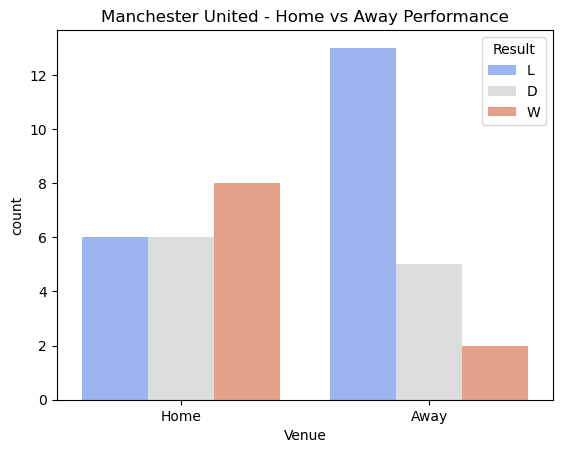

In [25]:
team_summary("Manchester United")


===== Liverpool =====
Result
D    18
W    16
L     6
Name: count, dtype: int64

Goals Summary:
GF Total: 88 | GA Total: 53
Avg xG: 1.94 | Avg xGA: 1.39
Avg Possession: 52.4 %


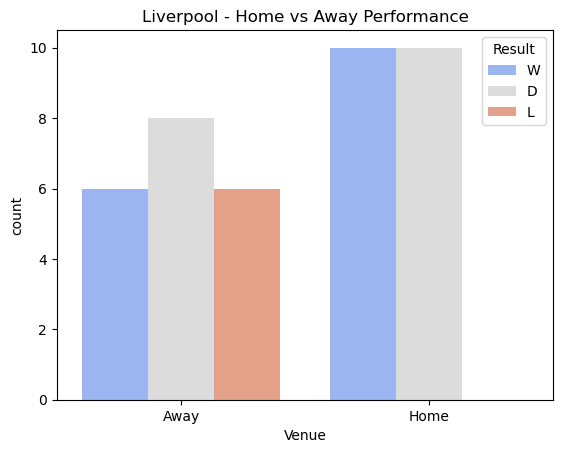

In [26]:
team_summary("Liverpool")


===== Manchester City =====
Result
W    19
L    11
D    10
Name: count, dtype: int64

Goals Summary:
GF Total: 73 | GA Total: 52
Avg xG: 1.84 | Avg xGA: 1.16
Avg Possession: 59.7 %


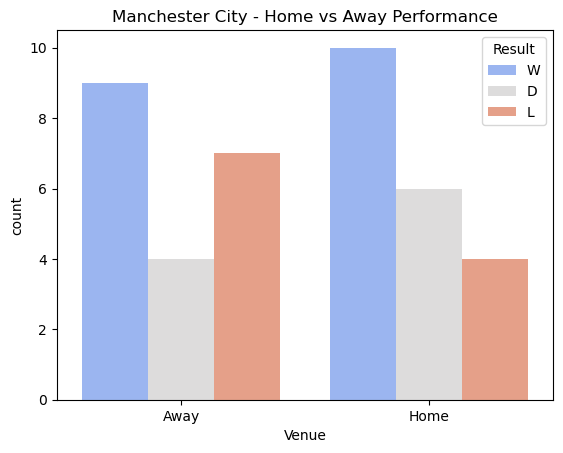

In [27]:
team_summary("Manchester City")


===== Tottenham =====
Result
L    23
W    10
D     7
Name: count, dtype: int64

Goals Summary:
GF Total: 59 | GA Total: 83
Avg xG: 1.48 | Avg xGA: 1.81
Avg Possession: 48.0 %


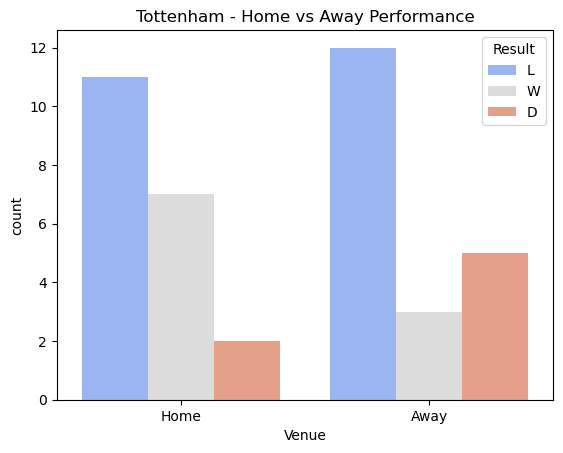

In [28]:
team_summary("Tottenham")

In [29]:
# --- Feature engineering 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle


df = df.copy()

# ensure datetime and sort (important for expanding/rolling)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)

# simple derived features
df['Is_Home'] = (df['Venue'].str.lower() == 'home').astype(int)
df['Goal_Diff'] = df['GF'] - df['GA']
df['xG_Diff'] = df['xG'] - df['xGA']

# formation to integer (e.g., "4-2-3-1" -> 4231), fallback 0
def formation_to_int(x):
    try:
        s = str(x)
        s = s.replace('-', '').strip()
        return int(s) if s and s.isdigit() else 0
    except:
        return 0

df['Formation_Code'] = df['Formation'].fillna('').apply(formation_to_int)
df['Opp_Form_Code'] = df['Opposition Formation'].fillna('').apply(formation_to_int)

# map Result -> points for form
points_map = {'W': 3, 'D': 1, 'L': 0}
df['Points'] = df['Result'].map(points_map).fillna(0).astype(int)

# columns to aggregate via expanding mean (team-level)
agg_cols = ['GF', 'GA', 'xG', 'xGA', 'Possession (%)', 'Points']

# 1) Team-level expanding means (up to previous match) using transform
for col in agg_cols:
    df[f'{col}_team_avg'] = df.groupby('Team')[col].transform(lambda x: x.expanding().mean().shift(1))

# 2) Create a helper table for opponent prior averages:
#    For each match row, we want the opponent's prior averages just before that date.
team_stats = df[['Date', 'Team'] + [f'{col}_team_avg' for col in agg_cols]].copy()
# rename Team -> Opponent so we can merge these as opponent stats
opp_rename = {f'{col}_team_avg': f'Opponent_{col}_avg' for col in agg_cols}
team_stats = team_stats.rename(columns={'Team': 'Opponent'}).rename(columns=opp_rename)

# merge opponent-level prior averages into main df (left join on Date & Opponent)
df = df.merge(team_stats, on=['Date', 'Opponent'], how='left')

# 3) Head-to-head rolling averages (per pair), leakage-safe with shift
# Use transform so output aligns with df index
df['H2H_GF_avg'] = df.groupby(['Team', 'Opponent'])['GF'].transform(lambda x: x.expanding().mean().shift(1))
df['H2H_GA_avg'] = df.groupby(['Team', 'Opponent'])['GA'].transform(lambda x: x.expanding().mean().shift(1))

# 4) Recent form: last 5 matches points (exclude current match)
# shift first then rolling
df['Form_last5_pts'] = df.groupby('Team')['Points'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
df['Form_last5_norm'] = df['Form_last5_pts'] / 3.0  # normalized 0-1

# 5) Team expanding GF/GA (alternative strength measures)
df['Team_GF_expanding'] = df.groupby('Team')['GF'].transform(lambda x: x.expanding().mean().shift(1))
df['Team_GA_expanding'] = df.groupby('Team')['GA'].transform(lambda x: x.expanding().mean().shift(1))

# Merge opponent expanding stats similarly (by matching Date & Opponent)
team_exp = df[['Date', 'Team', 'Team_GF_expanding', 'Team_GA_expanding']].rename(columns={
    'Team':'Opponent',
    'Team_GF_expanding':'Opponent_GF_expanding',
    'Team_GA_expanding':'Opponent_GA_expanding'
})
df = df.merge(team_exp, on=['Date','Opponent'], how='left')

# 6) Fill missing engineered numeric features sensibly
# collect engineered numeric columns we created
engineered_cols = [
    *(f'{col}_team_avg' for col in agg_cols),
    *(f'Opponent_{col}_avg' for col in agg_cols),
    'H2H_GF_avg', 'H2H_GA_avg',
    'Form_last5_pts', 'Form_last5_norm',
    'Team_GF_expanding', 'Team_GA_expanding',
    'Opponent_GF_expanding','Opponent_GA_expanding',
    'Formation_Code','Opp_Form_Code','Is_Home','Goal_Diff','xG_Diff'
]

# ensure columns exist and fill numeric NaN with column mean (first-match NaNs will be replaced)
for c in engineered_cols:
    if c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            df[c] = df[c].fillna(df[c].mean())
        else:
            df[c] = df[c].fillna(0)

# 7) Label encode Team & Opponent for model consumption (save encoders)
le_team = LabelEncoder()
le_opp = LabelEncoder()
df['Team_LE'] = le_team.fit_transform(df['Team'])
df['Opponent_LE'] = le_opp.fit_transform(df['Opponent'])

# save encoders if you want to reuse for new fixtures
with open('le_team.pkl', 'wb') as f:
    pickle.dump(le_team, f)
with open('le_opp.pkl', 'wb') as f:
    pickle.dump(le_opp, f)

# 8) Final feature list suggestion (trim as needed)
feature_cols = [
    'Team_LE','Opponent_LE','Is_Home',
    'Formation_Code','Opp_Form_Code','Goal_Diff','xG_Diff',
    'GF_team_avg','GA_team_avg','xG_team_avg','xGA_team_avg','Possession_team_avg','Points_team_avg',
    'Opponent_GF_avg','Opponent_GA_avg','Opponent_xG_avg','Opponent_xGA_avg','Opponent_Possession_avg','Opponent_Points_avg',
    'H2H_GF_avg','H2H_GA_avg',
    'Form_last5_pts','Form_last5_norm',
    'Team_GF_expanding','Team_GA_expanding',
    'Opponent_GF_expanding','Opponent_GA_expanding'
]
# keep only those that are present in df
feature_cols = [c for c in feature_cols if c in df.columns]

# quick sanity print
print("Number of rows:", len(df))
print("Number of feature columns:", len(feature_cols))
print("Sample of engineered features:")
display(df[['Date','Team','Opponent','Venue'] + feature_cols].head(6))

# df is now prepared for model training (targets: GF and GA)

Number of rows: 240
Number of feature columns: 25
Sample of engineered features:


,Date,Team,Opponent,Venue,Team_LE,Opponent_LE,Is_Home,Formation_Code,Opp_Form_Code,Goal_Diff,...,Opponent_xGA_avg,Opponent_Points_avg,H2H_GF_avg,H2H_GA_avg,Form_last5_pts,Form_last5_norm,Team_GF_expanding,Team_GA_expanding,Opponent_GF_expanding,Opponent_GA_expanding
0,2021-08-15,Manchester City,Tottenham,Away,3,5,0,433,433,-1,...,1.547589,1.354002,1.660351,1.660351,1.351709,0.45057,1.617241,1.654355,1.617241,1.654355
1,2021-08-15,Tottenham,Manchester City,Home,5,3,1,433,433,1,...,1.547589,1.354002,1.660351,1.660351,1.351709,0.45057,1.617241,1.654355,1.617241,1.654355
2,2021-08-22,Arsenal,Chelsea,Home,0,1,1,4231,343,-2,...,1.547589,1.354002,1.660351,1.660351,1.351709,0.45057,1.617241,1.654355,1.617241,1.654355
3,2021-08-22,Chelsea,Arsenal,Away,1,0,0,343,4231,2,...,1.547589,1.354002,1.660351,1.660351,1.351709,0.45057,1.617241,1.654355,1.617241,1.654355
4,2021-08-28,Manchester City,Arsenal,Home,3,0,1,433,541,5,...,3.100000,0.000000,1.660351,1.660351,0.000000,0.00000,0.000000,1.000000,0.000000,2.000000
5,2021-08-28,Arsenal,Manchester City,Away,0,3,0,541,433,-5,...,1.000000,0.000000,1.660351,1.660351,0.000000,0.00000,0.000000,2.000000,0.000000,1.000000


MAE (GF): 1.271
MAE (GA): 1.562
Match result accuracy: 0.396


,Team,Opponent,Venue,xG,xGA,Possession (%),Actual_GF,Actual_GA,Pred_GF,Pred_GA,Actual_Result,Pred_Result
192,Arsenal,Liverpool,Home,0.9,0.8,45,2,2,2,0,D,W
193,Liverpool,Arsenal,Away,0.8,0.9,55,2,2,1,5,D,L
194,Chelsea,Manchester United,Away,1.1,2.0,54,1,1,0,4,D,L
195,Manchester United,Chelsea,Home,2.0,1.1,46,1,1,0,0,D,D
196,Arsenal,Chelsea,Away,1.5,1.5,51,1,1,3,0,D,W
197,Chelsea,Arsenal,Home,1.5,1.5,49,1,1,2,3,D,L
198,Tottenham,Manchester City,Away,2.5,2.1,42,4,0,1,2,W,L
199,Manchester City,Tottenham,Home,2.1,2.5,58,0,4,2,0,L,W
200,Manchester City,Liverpool,Away,0.8,3.4,56,0,2,0,5,L,L
201,Liverpool,Manchester City,Home,3.4,0.8,44,2,0,2,2,W,D


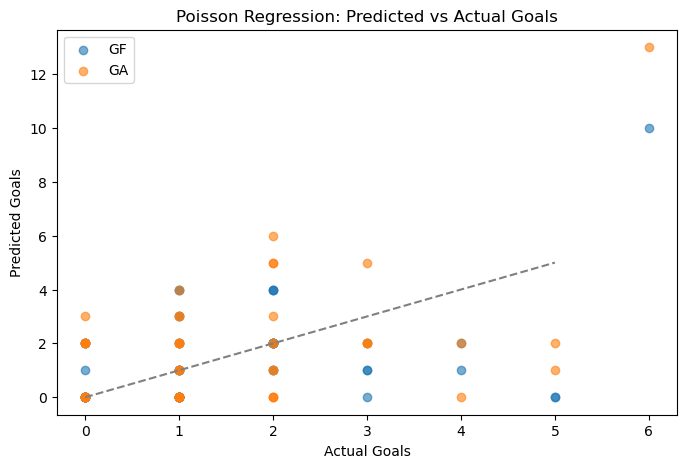

In [32]:
# Poisson regression pipeline 
import os
os.environ.setdefault("LOKY_MAX_CPU_COUNT", str(os.cpu_count() or 1))

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import random

RSEED = 42
np.random.seed(RSEED)
random.seed(RSEED)

# Ensure Date exists and is sorted
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)

# Features and targets
features = ['Team', 'Opponent', 'Venue', 'xG', 'xGA', 'Possession (%)']
X = df[features].copy()
y_GF = df['GF'].copy()
y_GA = df['GA'].copy()

# Split (80/20 time-based)
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_GF_train, y_GF_test = y_GF.iloc[:split_idx], y_GF.iloc[split_idx:]
y_GA_train, y_GA_test = y_GA.iloc[:split_idx], y_GA.iloc[split_idx:]

# Preprocessor
categorical = ['Team', 'Opponent', 'Venue']
numerical = ['xG', 'xGA', 'Possession (%)']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('num', 'passthrough', numerical)
])

# Pipelines
model_GF = Pipeline([
    ('prep', preprocessor),
    ('reg', PoissonRegressor(alpha=0.01, max_iter=500))
])

model_GA = Pipeline([
    ('prep', preprocessor),
    ('reg', PoissonRegressor(alpha=0.01, max_iter=500))
])

# Fit models
model_GF.fit(X_train, y_GF_train)
model_GA.fit(X_train, y_GA_train)

# Predict lambdas
GF_lambda = np.clip(model_GF.predict(X_test), 0, None)
GA_lambda = np.clip(model_GA.predict(X_test), 0, None)

# Convert to integer goals via Poisson sampling
GF_pred = np.random.poisson(lam=GF_lambda)
GA_pred = np.random.poisson(lam=GA_lambda)

# Evaluate
mae_GF = mean_absolute_error(y_GF_test, GF_pred)
mae_GA = mean_absolute_error(y_GA_test, GA_pred)
print("MAE (GF):", round(mae_GF, 3))
print("MAE (GA):", round(mae_GA, 3))

# Compare predicted vs actual results
def match_result(gf, ga):
    return np.where(gf > ga, 'W', np.where(gf < ga, 'L', 'D'))

actual_res = match_result(y_GF_test, y_GA_test)
pred_res = match_result(GF_pred, GA_pred)
acc = (actual_res == pred_res).mean()
print("Match result accuracy:", round(acc, 3))

# Show a preview
results = X_test.copy()
results['Actual_GF'] = y_GF_test.values
results['Actual_GA'] = y_GA_test.values
results['Pred_GF'] = GF_pred
results['Pred_GA'] = GA_pred
results['Actual_Result'] = actual_res
results['Pred_Result'] = pred_res
display(results.head(10))

# Quick plot
plt.figure(figsize=(8,5))
plt.scatter(y_GF_test, GF_pred, alpha=0.6, label='GF')
plt.scatter(y_GA_test, GA_pred, alpha=0.6, label='GA')
plt.plot([0,5],[0,5],'--',color='gray')
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Poisson Regression: Predicted vs Actual Goals")
plt.legend()
plt.show()


In [31]:
# -----------------------------
# Predict Big-6 25/26 fixtures (home + away per team)
# -----------------------------
import pandas as pd
import numpy as np
import os

# Repro for Poisson sampling
RSEED = 42
np.random.seed(RSEED)

# Sanity checks
if 'df' not in globals():
    raise RuntimeError("DataFrame `df` not found in namespace. Load and preprocess your dataset first.")
if 'model_GF' not in globals() or 'model_GA' not in globals():
    raise RuntimeError("Trained models `model_GF` and `model_GA` not found. Train them (Poisson pipelines) before running this cell.")

# Teams list (Big-6)
teams = sorted(df['Team'].unique())
print("Teams detected:", teams)
if len(teams) != 6:
    print("Warning: detected {} teams (expected 6). Proceeding with detected teams.".format(len(teams)))

# Build fixtures: every pair -> add BOTH Home and Away from perspective of 'Team'
fixtures = []
for t in teams:
    for o in teams:
        if t == o:
            continue
        # add home match for team t vs opponent o
        fixtures.append({'Team': t, 'Opponent': o, 'Venue': 'Home'})
        # add away match for team t at opponent o
        fixtures.append({'Team': t, 'Opponent': o, 'Venue': 'Away'})

fixtures_df = pd.DataFrame(fixtures)

# Sanity: drop duplicates (shouldn't be any), reset index
fixtures_df = fixtures_df.drop_duplicates().reset_index(drop=True)
print("Fixture count (team-centric rows):", len(fixtures_df))  # should be 60 (6 teams * 10 matches)


team_avg = df.groupby('Team')[['xG','xGA','Possession (%)']].mean().reset_index().rename(columns={
    'xG':'xG_team_mean','xGA':'xGA_team_mean','Possession (%)':'Poss_team_mean'
})


fixtures_df = fixtures_df.merge(team_avg, left_on='Team', right_on='Team', how='left')


global_means = df[['xG','xGA','Possession (%)']].mean()
fixtures_df['xG'] = fixtures_df['xG_team_mean'].fillna(global_means['xG'])
fixtures_df['xGA'] = fixtures_df['xGA_team_mean'].fillna(global_means['xGA'])
fixtures_df['Possession (%)'] = fixtures_df['Poss_team_mean'].fillna(global_means['Possession (%)'])


fixtures_df = fixtures_df[['Team','Opponent','Venue','xG','xGA','Possession (%)']]

# Predict lambdas using trained pipelines
lambda_GF = model_GF.predict(fixtures_df)
lambda_GA = model_GA.predict(fixtures_df)

# Ensure non-negative
lambda_GF = np.clip(lambda_GF, 0.0, None)
lambda_GA = np.clip(lambda_GA, 0.0, None)

# Convert lambdas to integer scorelines via Poisson sampling
pred_GF_sample = np.random.poisson(lam=lambda_GF)
pred_GA_sample = np.random.poisson(lam=lambda_GA)

# Add predictions to fixtures
fixtures_df['Lambda_GF'] = lambda_GF
fixtures_df['Lambda_GA'] = lambda_GA
fixtures_df['Pred_GF'] = pred_GF_sample
fixtures_df['Pred_GA'] = pred_GA_sample

# Predicted result label
def result_label(gf, ga):
    return 'W' if gf > ga else ('L' if gf < ga else 'D')

fixtures_df['Pred_Result'] = [result_label(gf,ga) for gf,ga in zip(fixtures_df['Pred_GF'], fixtures_df['Pred_GA'])]

# Show full fixtures predictions
pd.set_option('display.max_rows', 200)
print("\nPredicted 25/26 fixtures (sampled Poisson) — now includes away matches:")
display(fixtures_df)

# Save to CSV
fixtures_df.to_csv("predicted_25_26_fixtures_full.csv", index=False)
print("Saved predicted fixtures to predicted_25_26_fixtures_full.csv")

# Per-team report (10 matches each)
reports = {}
for team in teams:
    team_matches = fixtures_df[fixtures_df['Team'] == team].copy().reset_index(drop=True)
    counts = team_matches['Pred_Result'].value_counts().to_dict()
    wins = counts.get('W',0)
    draws = counts.get('D',0)
    losses = counts.get('L',0)
    reports[team] = {
        'Matches': len(team_matches),
        'Wins': wins,
        'Draws': draws,
        'Losses': losses,
        'Goals_For': int(team_matches['Pred_GF'].sum()),
        'Goals_Against': int(team_matches['Pred_GA'].sum())
    }
    print(f"\n=== {team} — Predicted Matches ({len(team_matches)} rows) ===")
    display(team_matches[['Team','Opponent','Venue','Pred_GF','Pred_GA','Pred_Result']])

# Summary table for all teams
summary_df = pd.DataFrame.from_dict(reports, orient='index')
summary_df = summary_df[['Matches','Wins','Draws','Losses','Goals_For','Goals_Against']]
print("\nPer-team summary (predicted):")
display(summary_df)

summary_df.to_csv("predicted_25_26_team_summary_full.csv")
print("Saved per-team summary to predicted_25_26_team_summary_full.csv")

Teams detected: ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham']
Fixture count (team-centric rows): 60

Predicted 25/26 fixtures (sampled Poisson) — now includes away matches:


,Team,Opponent,Venue,xG,xGA,Possession (%),Lambda_GF,Lambda_GA,Pred_GF,Pred_GA,Pred_Result
0,Arsenal,Chelsea,Home,1.4375,1.5075,46.60,1.530375,1.136198,3,0,W
1,Arsenal,Chelsea,Away,1.4375,1.5075,46.60,1.425310,1.219980,0,2,L
2,Arsenal,Liverpool,Home,1.4375,1.5075,46.60,1.433661,1.548665,0,2,L
3,Arsenal,Liverpool,Away,1.4375,1.5075,46.60,1.335236,1.662862,0,0,D
4,Arsenal,Manchester City,Home,1.4375,1.5075,46.60,1.453748,1.608020,3,2,W
5,Arsenal,Manchester City,Away,1.4375,1.5075,46.60,1.353944,1.726594,2,2,D
6,Arsenal,Manchester United,Home,1.4375,1.5075,46.60,1.989937,1.247262,1,1,D
7,Arsenal,Manchester United,Away,1.4375,1.5075,46.60,1.853322,1.339234,2,2,D
8,Arsenal,Tottenham,Home,1.4375,1.5075,46.60,2.069278,1.340892,2,0,W
9,Arsenal,Tottenham,Away,1.4375,1.5075,46.60,1.927216,1.439768,1,2,L


Saved predicted fixtures to predicted_25_26_fixtures_full.csv

=== Arsenal — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Arsenal,Chelsea,Home,3,0,W
1,Arsenal,Chelsea,Away,0,2,L
2,Arsenal,Liverpool,Home,0,2,L
3,Arsenal,Liverpool,Away,0,0,D
4,Arsenal,Manchester City,Home,3,2,W
5,Arsenal,Manchester City,Away,2,2,D
6,Arsenal,Manchester United,Home,1,1,D
7,Arsenal,Manchester United,Away,2,2,D
8,Arsenal,Tottenham,Home,2,0,W
9,Arsenal,Tottenham,Away,1,2,L



=== Chelsea — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Chelsea,Arsenal,Home,2,0,W
1,Chelsea,Arsenal,Away,1,2,L
2,Chelsea,Liverpool,Home,0,1,L
3,Chelsea,Liverpool,Away,1,1,D
4,Chelsea,Manchester City,Home,0,3,L
5,Chelsea,Manchester City,Away,3,1,W
6,Chelsea,Manchester United,Home,0,2,L
7,Chelsea,Manchester United,Away,2,3,L
8,Chelsea,Tottenham,Home,1,0,W
9,Chelsea,Tottenham,Away,1,0,W



=== Liverpool — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Liverpool,Arsenal,Home,2,3,L
1,Liverpool,Arsenal,Away,1,1,D
2,Liverpool,Chelsea,Home,6,3,W
3,Liverpool,Chelsea,Away,0,0,D
4,Liverpool,Manchester City,Home,0,0,D
5,Liverpool,Manchester City,Away,1,2,L
6,Liverpool,Manchester United,Home,2,0,W
7,Liverpool,Manchester United,Away,2,1,W
8,Liverpool,Tottenham,Home,1,0,W
9,Liverpool,Tottenham,Away,3,2,W



=== Manchester City — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Manchester City,Arsenal,Home,4,0,W
1,Manchester City,Arsenal,Away,1,1,D
2,Manchester City,Chelsea,Home,2,0,W
3,Manchester City,Chelsea,Away,0,3,L
4,Manchester City,Liverpool,Home,1,1,D
5,Manchester City,Liverpool,Away,3,1,W
6,Manchester City,Manchester United,Home,0,0,D
7,Manchester City,Manchester United,Away,4,3,W
8,Manchester City,Tottenham,Home,2,2,D
9,Manchester City,Tottenham,Away,0,1,L



=== Manchester United — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Manchester United,Arsenal,Home,0,2,L
1,Manchester United,Arsenal,Away,1,3,L
2,Manchester United,Chelsea,Home,2,2,D
3,Manchester United,Chelsea,Away,1,5,L
4,Manchester United,Liverpool,Home,0,2,L
5,Manchester United,Liverpool,Away,0,1,L
6,Manchester United,Manchester City,Home,0,3,L
7,Manchester United,Manchester City,Away,0,2,L
8,Manchester United,Tottenham,Home,5,4,W
9,Manchester United,Tottenham,Away,4,1,W



=== Tottenham — Predicted Matches (10 rows) ===


,Team,Opponent,Venue,Pred_GF,Pred_GA,Pred_Result
0,Tottenham,Arsenal,Home,0,6,L
1,Tottenham,Arsenal,Away,0,5,L
2,Tottenham,Chelsea,Home,3,0,W
3,Tottenham,Chelsea,Away,1,1,D
4,Tottenham,Liverpool,Home,0,2,L
5,Tottenham,Liverpool,Away,0,1,L
6,Tottenham,Manchester City,Home,2,0,W
7,Tottenham,Manchester City,Away,2,2,D
8,Tottenham,Manchester United,Home,3,2,W
9,Tottenham,Manchester United,Away,1,1,D



Per-team summary (predicted):


,Matches,Wins,Draws,Losses,Goals_For,Goals_Against
Arsenal,10,3,4,3,14,13
Chelsea,10,4,1,5,11,13
Liverpool,10,5,3,2,18,12
Manchester City,10,4,4,2,17,12
Manchester United,10,2,1,7,13,25
Tottenham,10,3,3,4,12,20


Saved per-team summary to predicted_25_26_team_summary_full.csv


In [33]:
import joblib

joblib.dump(model_GF, "model_GF.pkl")
joblib.dump(model_GA, "model_GA.pkl")

print("Models saved ✅")


Models saved ✅
